# Average % Value Loss vs Fires by Building Stories

In the series and bar chart below 1.5 stories have the highest percentage loss out of Building stories. 74 percent of structure types in the data set are dwelings or apartments. The Data frame has a condition that only allows less than 100 stories to be in dataframe. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
import datetime as dt



In [2]:
df = pd.read_csv('FirePy/Fire.csv')

df

,index,ID,DATE,TIME,ZIP,BATTALION,SHIFT,COUNCIL DISTRICT,STRUCTURE TYPE,BUILDING STORIES,...,TOTAL VALUE,STRUCTURE LOSS,CONTENTS LOSS,TOTAL SAVED,PERCENTAGE LOSS,SPRINKER SYSTEM,ALARM SYSTEM,ADDRESS,Lat,Lng
0,0,17961.0,10/29/2019,08:21 PM,75216.0,6,A,4.0,DWELLING,1.0,...,166370.0,-5000.0,0.0,161370.0,3.01,NaN,NaN,1325 S MARSALIS AVE,32.732107,-96.814783
1,1,17962.0,10/30/2019,03:42 AM,75229.0,7,A,13.0,DWELLING,1.0,...,535470.0,-10000.0,0.0,525470.0,1.87,NaN,NaN,10728 LATHROP DR,32.894248,-96.857108
2,2,17963.0,10/30/2019,10:47 AM,75241.0,5,B,3.0,DWELLING,1.0,...,306000.0,-5000.0,-15000.0,286000.0,6.54,NaN,NaN,6205 S R L THORNTON SERV,32.694543,-96.824020
3,3,17964.0,10/30/2019,05:32 PM,75243.0,2,B,10.0,DWELLING,1.0,...,126710.0,-8000.0,-4000.0,114710.0,9.47,NaN,NaN,12044 WILLOWDELL DR,32.913584,-96.764435
4,4,17965.0,10/30/2019,11:03 AM,75212.0,9,B,6.0,DWELLING,1.0,...,84000.0,-45000.0,-10000.0,29000.0,65.48,NaN,NaN,2212 LAPSLEY ST,32.769986,-96.908816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,18414.0,09/03/2020,02:12 AM,75227.0,8,A,7.0,DWELLING,1.0,...,261000.0,-15000.0,-2500.0,243500.0,6.70,NO,YES,5024 URBAN AVE,32.783636,-96.694285
617,617,18459.0,09/19/2020,08:49 AM,75214.0,3,C,14.0,APARTMENTS,2.0,...,2240263.0,-2500.0,0.0,2237763.0,0.11,NaN,UNK,5307 GASTON AVE,32.803882,-96.765385
618,618,18496.0,09/24/2020,07:11 PM,75243.0,4,B,10.0,APARTMENTS,3.0,...,7357830.0,-200.0,0.0,7357630.0,0.00,YES,UKN,218 W FERRIS BRANCH BLVD,32.903830,-96.726209
619,619,18514.0,09/30/2020,07:15 AM,75253.0,8,B,8.0,SHED,1.0,...,1500.0,-500.0,-100.0,900.0,40.00,NO,NO,14770 LASATER RD,32.692136,-96.567056


In [58]:
df.column()


AttributeError: 'DataFrame' object has no attribute 'column'

In [14]:
df["STRUCTURE TYPE"].value_counts()


DWELLING                 273
APARTMENTS               190
COMMERCIAL                61
SHED                      13
GARAGE                    12
WAREHOUSE                  8
CONDOMINIUMS               8
MOTEL                      6
HOTEL                      6
COMMERICAL                 6
RESTAURANT                 5
SCHOOL                     3
OFFICE                     3
DUPLEX                     3
MOBILE HOME                3
CHURCH                     2
APARTMENT                  2
TOWNHOME                   2
CONDO                      2
CONDOMINUM                 1
DWELLING (WINDOW)          1
APARTMENTS (ROOF TOP)      1
SHOPPING MALL              1
LAUNDRY ROOM               1
MANUFACTURING              1
RETAIL                     1
4 PLEX                     1
CARPORT                    1
COMMERICAL/WAREHOUSE       1
CONDOMINIUM                1
PORTABLE BLDG              1
MANUFACTURE                1
Name: STRUCTURE TYPE, dtype: int64

In [49]:
count = df["STRUCTURE TYPE"].count()

dwell_apt = 273 + 190
count

dwell_apt_pct = dwell_apt / count * 100
dwell_apt_pct

74.55716586151368

In [3]:
avg_loss_by_stories=df.groupby(['BUILDING STORIES']).mean()['PERCENTAGE LOSS']
avg_loss_by_stories

BUILDING STORIES
1.0     16.240255
1.5     18.938000
2.0      3.601893
3.0      6.007576
4.0      0.023750
5.0      0.356000
6.0      0.715000
7.0      0.170000
11.0     0.000000
12.0     0.070000
14.0     0.340000
26.0     0.190000
Name: PERCENTAGE LOSS, dtype: float64

In [4]:
# Freqeuncy of fire based on time

df[['HOUR', 'AM/PM']] = df['TIME'].str.split(':', expand=True)
df

df[['MINUTE', 'AM/PM']] = df['AM/PM'].str.split(' ', expand=True)

df_group = df.groupby(["AM/PM", "HOUR"]).median()

df_group 

index       ID      ZIP  COUNCIL DISTRICT  BUILDING STORIES  \
AM/PM HOUR                                                                
AM    01    248.0  17730.0  75228.0               9.0              1.00   
      02    423.0  18162.0  75219.0               7.0              1.00   
      03    290.0  17887.5  75214.0               4.0              1.00   
      04    222.0  17686.0  75224.0               6.0              1.00   
      05    286.0  17785.0  75221.5               6.5              1.25   
      06    165.0  17472.0  75221.5               5.5              1.00   
      07    315.0  17971.0  75230.0               8.0              1.00   
      08    286.0  17810.0  75217.0               5.0              1.00   
      09    387.0  18098.5  75220.0               6.5              1.50   
      10    254.5  17863.0  75219.0               6.0              1.00   
      11    234.0  17892.5  75227.5               7.0              2.00   
      12    227.0  17701.0  75217.0               7.0              1.00   
PM    01    351.0  18035.0  75228.0               8.0              1.00   
      02    303.5  17813.5  75223.0               7.0              1.50   
      03    362.0  18065.0  75220.0               6.0              1.00   
      04    191.0  17578.0  75217.0               6.0              1.00   
      05    313.0  18002.0  75228.0               8.0              1.00   
      06    309.0  17890.0  75222.0               7.0              2.00   
      07    330.0  17993.0  75220.0              10.0              2.00   
      08    234.0  17734.0  75225.5               7.0              1.00   
      09    361.0  18085.0  75218.0               7.0              1.00   
      10    389.0  18080.5  75225.5               7.0              1.00   
      11    397.0  18115.0  75228.0               7.0              1.00   
      12    312.0  17829.0  75217.0               5.5              1.00   

            TOTAL VALUE  STRUCTURE LOSS  CONTENTS LOSS  TOTAL SAVED  \
AM/PM HOUR                                                            
AM    01       300000.0        -10000.0            0.0     208040.0   
      02       176650.0         -3000.0            0.0     167660.0   
      03       165420.0         -2750.0            0.0     107920.0   
      04       342440.0        -10000.0         -200.0     332000.0   
      05       166430.0        -15000.0        -1500.0     155925.0   
      06       127340.0        -19000.0        -1500.0     100715.0   
      07      1703390.0         -2000.0          -25.0    1683390.0   
      08       242510.0         -1000.0            0.0     205140.0   
      09       240175.0         -2000.0            0.0     227175.0   
      10       384145.0         -7500.0         -275.0     370095.0   
      11       192810.0         -4250.0          -50.0     171010.0   
      12       128560.0        -15000.0        -1000.0     125610.0   
PM    01       263000.0         -2000.0         -100.0     262000.0   
      02       507500.0         -5000.0         -275.0     495875.0   
      03       150000.0         -5000.0            0.0     118500.0   
      04       155000.0         -1000.0          -50.0     135000.0   
      05       566500.0         -1750.0          -75.0     511735.0   
      06       789500.0         -2250.0            0.0     781500.0   
      07       729800.0          -500.0         -500.0     727300.0   
      08       250000.0         -1750.0         -550.0     234900.0   
      09       224870.0         -5000.0            0.0     201370.0   
      10       231330.0         -4750.0            0.0     199940.0   
      11       280540.0         -1000.0            0.0     250540.0   
      12       127000.0         -5000.0         -250.0     120000.0   

            PERCENTAGE LOSS        Lat        Lng  
AM/PM HOUR                                         
AM    01              3.110  32.825511 -96.757220  
      02              1.330  32.768660 -96.797519  
      

[ 1.   1.5  2.   3.   4.   5.   6.   7.  11.  12.  14.  26. ]


Text(0.5, 1.0, 'Average % Value Loss in Fires by Building_Stories')

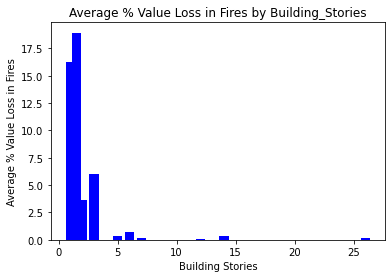

In [9]:
building_story = df['BUILDING STORIES'].unique()
building_story.sort()
print(building_story)

# plot avg. loss by battalion on scatter plot

x_axis=building_story
y_axis=avg_loss_by_stories
plt.bar(x_axis,y_axis,color=['blue'])

plt.xlabel("Building Stories")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Building_Stories")


In [6]:
df["TIME"].dtypes

dtype('O')

In [59]:
fire_type = df['STRUCTURE TYPE'].value_counts()
fire_type.sort()
p1 = plt.bar( fire_type.index.values,fire_type.values)
plt.xlabel("Building Type")
plt.xticks(rotation=90)



plt.show()

AttributeError: 'Series' object has no attribute 'sort'

In [8]:
df['TIME'] =  pd.to_datetime(df['TIME'], format='%d%b%Y:%H:%M:%S.%f'

SyntaxError: unexpected EOF while parsing (2379640388.py, line 1)

In [111]:
df["TIME"]

AttributeError: 'Series' object has no attribute 'split'